This notebook illustrates the motivation for redescription mining.

References:
1. Esther Galbrun, Pauli Miettinen "Redescription Mining" (SpringerBriefs in Computer Science), 2018
2. An Introduction to Redescription Mininghttp://siren.mpi-inf.mpg.de/tutorial_sdm2017/main/
3. Siren - Interactive and visual redescription mininghttp://siren.gforge.inria.fr/main/


# Data

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import os, sys
from bs4 import BeautifulSoup
import re
import pandas as pd


chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1920x1080")

# download the chrome driver from https://sites.google.com/a/chromium.org/chromedriver/downloads and put it in the
# current directory
chrome_driver = '/opt/chrome/chromedriver'

## APD Crime Data

In [3]:
driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=chrome_driver)
driver.get("http://www.atlantapd.org/i-want-to/crime-data-downloads")
#lucky_button = driver.find_element_by_css_selector("[name=btnI]")
#lucky_button.click()

# capture the screen
driver.get_screenshot_as_file("apd_download.png")
driver.close()

![](apd_download.png)

In [ ]:
# %%sh
# rm COBRA2017.zip COBRA-2017.csv 'READ ME.txt'
# wget -O COBRA2017.zip http://www.atlantapd.org/Home/ShowDocument?id=2026
# unzip COBRA2017.zip
# ls -l COBRA*

In [4]:
cobra_df = pd.read_excel('COBRA-YTD2017.xlsx', 'Query')
crime = cobra_df[cobra_df[u'MinOfucr']>300] \
    .pivot_table(values='offense_id', index='npu', columns='UC2 Literal', aggfunc='count', fill_value=0)
print(crime.shape)

(25, 9)


In [5]:
crime

UC2 Literal,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
npu,,,,,,,,,
A,3,13,3,19,67,24,0,0,0
B,39,160,41,92,639,824,7,49,1
C,8,46,8,20,154,60,2,6,0
D,15,113,24,44,494,170,5,15,2
E,67,196,46,68,957,475,11,68,4
F,23,74,44,45,374,180,10,21,1
G,61,55,13,62,138,54,1,16,4
H,74,63,9,91,125,71,3,29,5
I,103,129,19,145,229,137,6,34,2


In [ ]:
%%sh
pwd

## Neighborhood Data

In [30]:
driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=chrome_driver)
driver.get("http://cspav.gatech.edu/NQOLH/About_NPUs/A/")
#lucky_button = driver.find_element_by_css_selector("[name=btnI]")
#lucky_button.click()

# capture the screen
driver.get_screenshot_as_file("capture3.png")
soup = BeautifulSoup(driver.page_source, 'lxml')
driver.close()

![](capture3.png)

loading tables 

In [31]:
totaldf = pd.DataFrame()
driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=chrome_driver)
for N in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
          'V', 'W', 'X', 'Y', 'Z']:
    driver.get("http://cspav.gatech.edu/NQOLH/About_NPUs/%s/"%N)
    soup = BeautifulSoup(driver.page_source, 'lxml')
   
    for t in  soup.findAll(name='table'):
        res = pd.read_html(t.prettify())
        if len(res)==0:
            continue
        df = res[0]
        if (df.shape[1]==3) and ('Variables' in df.columns):
            npu = df.columns[1].replace('NPU ', '')
            df.columns = ['Variables', 'Value', 'AtlantaValue']
            df['npu'] = npu
            if df.shape[0]==7:
                df['table'] = 'Geography'
            elif df.shape[0]==17:
                df['table'] = 'Quality of Life'
            elif df.shape[0]==13:
                df['table'] = 'Health'
            else:
                df['table'] = 'Unknown'
            totaldf = pd.concat([totaldf, df])
driver.close()
print(totaldf.shape)
totaldf.drop_duplicates(inplace=True)
print(totaldf.shape)
totaldf.head()

(22032, 5)
(901, 5)


,Variables,Value,AtlantaValue,npu,table
0,Population,14272,425931,A,Geography
1,Population Density,2 persons per acre,5 persons per acre,A,Geography
2,Racial Composition,"88% White, 5%Black, 3% Asian, and 4% Other","39.0% White, 53.8% Black, 3.3% Asian, and 3.9%...",A,Geography
3,Unemployment Rates,5%,12.4%,A,Geography
4,Median Household Income,"$149,648","$46,146",A,Geography


In [ ]:
totaldfldf.to_excel('')

In [ ]:
totaldf.groupby('table').agg({'Variables': 'count'})

In [ ]:
geography = totaldf[totaldf.table=='Geography'].pivot(index='npu', columns='Variables', values='Value')
print(geography.shape, ', '.join(geography.index))

In [ ]:
health = totaldf[totaldf.table=='Health'].pivot(index='npu', columns='Variables', values='Value')
print(health.shape, ', '.join(health.index))

In [ ]:
life = totaldf[totaldf.table=='Quality of Life'].pivot(index='npu', columns='Variables', values='Value')
print(life.shape, ', '.join(life.index))

# Decision Tree

## BURGLARY-RESIDENCE
```
I 145
W 140
V 108
R 106
```

In [29]:
def decision_tree_graph(df, npus):
    from sklearn.datasets import load_iris
    from sklearn import tree
    import numpy as np
    import graphviz 
    data = np.array(df)
    target = np.zeros(df.shape[0])
    target[[x for x in map(lambda s: s in npus, df.index)]] = 1
    featurenames = df.columns
    clf = tree.DecisionTreeClassifier() ### (max_depth=2)
    clf = clf.fit(data, target)
    
    dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=featurenames,  
                         class_names=['Others', npus],  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data) 
    return graph

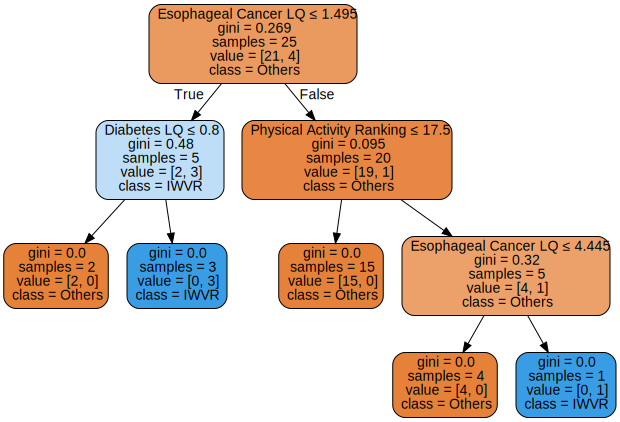

In [46]:
decision_tree_graph(health, 'IWVR')

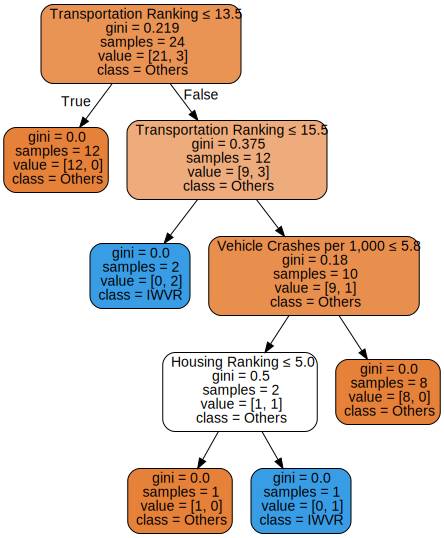

In [47]:
decision_tree_graph(life, 'IWVR')

In [55]:
def just_numeric(s):
    import re
    return re.sub(r'[a-zA-Z\$,%]', '', s)
    
geo_numeric = geography[['College Attainment', 'Median Household Income',
       'Percent Living Below Poverty Line', 'Population', 'Population Density', 'Unemployment Rates']] \
    .applymap(just_numeric)
geo_numeric.head()

Variables,College Attainment,Median Household Income,Percent Living Below Poverty Line,Population,Population Density,Unemployment Rates
npu,,,,,,
A,82,149648,4,14272,2,5
B,74,94982,8,44276,6.8,3
D,61,78426,17,12516,3,8
E,72,64081,17,43164,11.4,7
F,72,89898,11,21940,7.3,5


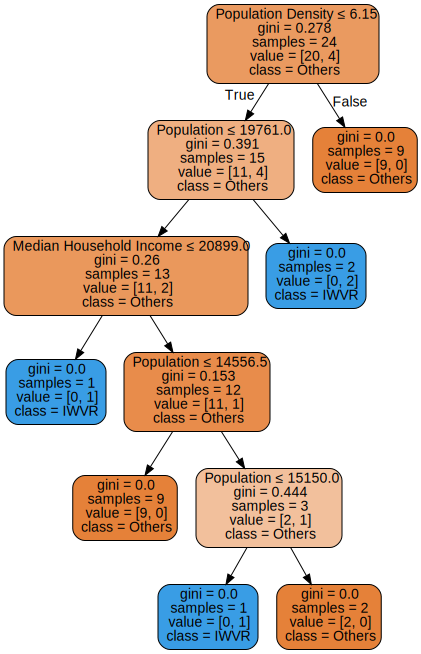

In [56]:
decision_tree_graph(geo_numeric, 'IWVR')

## Auto Theft
E, M, B

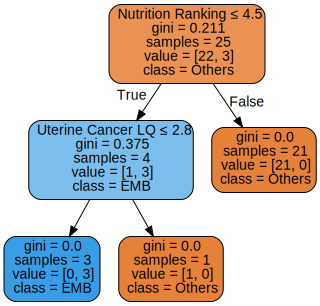

In [57]:
decision_tree_graph(health, 'EMB')

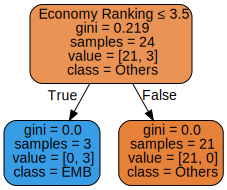

In [58]:
decision_tree_graph(life, 'EMB')

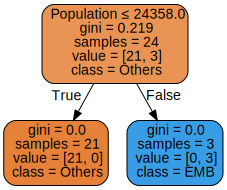

In [59]:
decision_tree_graph(geo_numeric, 'EMB')

## All together

In [60]:
for t in [('health', health), ('life', life), ('geography', geo_numeric)]:
    for c in [('burglary_residence', 'IWVR'), ('auto_theft', 'EMB')]:
        g = decision_tree_graph(t[1], c[1])
        g.render("%s_%s"%(c[0], t[0]))

In [62]:
%%sh
pwd
ls *.pdf

/home/pmolnar
1017-001.pdf
auto_theft_geography.pdf
auto_theft_health.pdf
auto_theft_life.pdf
burglary_residence_geography.pdf
burglary_residence_health.pdf
burglary_residence_life.pdf
ExponentialSmoothing.pdf
health_burg_res.pdf
iris.pdf
iris.png.pdf
NPU_M.pdf


In [ ]:
import numpy as np
health_data = np.array(health)
health_target = np.zeros(health.shape[0])
health_target[[x for x in map(lambda s: s in 'MEBD', health.index)]] = 1
health_featurenames = health.columns
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(health_data, health_target)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=health_featurenames,  
                         class_names=['Others', 'MEBD'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("NPU_M") 

In [ ]:
%%sh
convert NPU_M.pdf NPU_M.png

![](NPU_M.png)

In [ ]:
list(zip(health.index.values, health_target, clf.predict(health_data)))

In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print( "{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print( "{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [ ]:
tree_to_code(clf, health_featurenames)

In [ ]:
totaldf[totaldf.table=='Geography'].pivot(index='npu', columns='Variables', values='Value')

# Clustering

In [9]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(np.array(crime).astype(float))



print("Crime Data Columns: %s"%(', '.join(crime.columns)))

Crime Data Columns: AGG ASSAULT, AUTO THEFT, BURGLARY-NONRES, BURGLARY-RESIDENCE, LARCENY-FROM VEHICLE, LARCENY-NON VEHICLE, ROBBERY-COMMERCIAL, ROBBERY-PEDESTRIAN, ROBBERY-RESIDENCE


(25, 2)


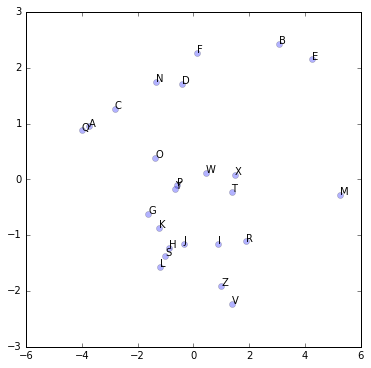

In [12]:
#fields = ['AUTO THEFT',  'LARCENY-NON VEHICLE',]
fields = crime.columns

scaler = StandardScaler()
X_ = np.array(crime[fields]).astype(float)
scaler.fit(X_)
X = scaler.transform(np.array(X_))
#X = np.array(crime)
#kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_embedded = TSNE(n_components=2).fit_transform(X)
X_pca= PCA(n_components=2).fit_transform(X)
print(X_embedded.shape)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
# plt.plot(X_embedded[:,0], X_embedded[:,1], 'o', alpha=0.3 )
# for c in range(len(X_embedded)):
#     plt.text(X_embedded[c,0], X_embedded[c,1],  crime.index.values[c])
# plt.show()
plt.plot(X_pca[:,0], X_pca[:,1], 'o', alpha=0.3 )
for c in range(len(X_embedded)):
    plt.text(X_pca[c,0], X_pca[c,1],  crime.index.values[c])
plt.show()

In [ ]:
## Health and Life

In [ ]:
h_scaler = StandardScaler()
X_h = np.array(health).astype(float)
h_scaler.fit(X_h)
X_h_pca = PCA(n_components=2).fit_transform(h_scaler.transform(X_h))
plt.plot(X_h_pca[:,0], X_h_pca[:,1], 'o', alpha=0.3 )
for c in range(len(X_embedded)):
    plt.text(X_h_pca[c,0], X_h_pca[c,1],  health.index.values[c])
plt.show()

In [ ]:
l_scaler = StandardScaler()
X_l = np.array(life).astype(float)
l_scaler.fit(X_l)
X_l_pca = PCA(n_components=2).fit_transform(l_scaler.transform(X_l))
plt.plot(X_l_pca[:,0], X_l_pca[:,1], 'o', alpha=0.3 )
for c in range(len(life.index.values)):
    plt.text(X_l_pca[c,0], X_l_pca[c,1],  health.index.values[c])
plt.show()

# Leading Crimes

In [27]:
for ct in crime.columns:
    print(ct)
    ser = crime[ct].sort_values(ascending=False)
    # print(', '.join(["%s: %d"%(t[0], int(t[1])) for t in zip(ser.index, ser.values)]))
    cs = np.cumsum(ser)
    s = np.sum(ser)
    x = 1.0*cs/s
    for j in range(len(ser)):
        # print(x[j])
        if x[j]<0.3:
            print(ser.index[j], ser.values[j])

AGG ASSAULT
M 148
V 123
Z 117
AUTO THEFT
E 196
M 175
B 160
BURGLARY-NONRES
R 47
E 46
F 44
BURGLARY-RESIDENCE
I 145
W 140
V 108
R 106
LARCENY-FROM VEHICLE
M 967
E 957
LARCENY-NON VEHICLE
B 824
ROBBERY-COMMERCIAL
T 12
E 11
ROBBERY-PEDESTRIAN
M 107
E 68
T 68
ROBBERY-RESIDENCE
R 11
M 9
